In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from scipy.stats.stats import pearsonr

import seaborn as sns
sns.set_style('whitegrid')
pd.options.display.max_rows = 999

In [2]:
full = pd.read_csv('Task2.Train.Inputs.txt')

In [64]:
full.shape

(99993, 23)

In [3]:
full.describe()

,amount,hour1,zip1,custAttr1,field1,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,26.976580,14.016050,544.307340,1.234568e+15,2.368270,0.405380,14.030530,0.419710,26.976580,368.796390,15.026270,0.113370,0.017850,0.556400,0.391400,0.013730,16.03735
std,14.595018,5.415115,317.286574,2.140178e+04,0.998768,0.490968,5.409443,0.493514,14.595018,4151.204585,6.450308,0.317046,0.132407,0.496811,0.488066,0.116368,191.19456
min,0.000000,0.000000,6.000000,1.234568e+15,0.000000,0.000000,0.000000,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,12.950000,11.000000,279.000000,1.234568e+15,2.000000,0.000000,11.000000,0.000000,12.950000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,25.900000,14.000000,535.000000,1.234568e+15,3.000000,0.000000,14.000000,0.000000,25.900000,1093.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,38.850000,18.000000,891.000000,1.234568e+15,3.000000,1.000000,18.000000,1.000000,38.850000,3517.250000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000
max,59.950000,23.000000,999.000000,1.234568e+15,4.000000,1.000000,23.000000,1.000000,59.950000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.00000


In [4]:
full.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1


In [5]:
full.shape

(100000, 19)

In [6]:
full.isnull().sum()

amount        0
hour1         0
state1        1
zip1          0
custAttr1     0
field1        0
custAttr2     0
field2        0
hour2         0
flag1         0
total         0
field3        0
field4        0
indicator1    0
indicator2    0
flag2         0
flag3         0
flag4         0
flag5         0
dtype: int64

In [7]:
full.loc[full.state1.isnull()]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
80876,49.95,20,NaN,9,1234567890183719,3,womaeenhfvtfu@hotmail.com,0,20,0,49.95,3166,23,1,0,1,0,0,1


In [8]:
#train['state1'].value_counts().index[0]
#train[train.state1.isnull()].state1 why it is not working on setting the values
#full['state1']=full['state1'].fillna(full['state1'].value_counts().index[0])
full = full[full.state1.notnull()]
full[full.state1.isnull()].state1

Series([], Name: state1, dtype: object)

In [9]:
full2 = pd.read_csv('Task2.Train.Targets.txt',header=None)
full2.columns = ['fraud']
full['fraud']=full2['fraud']
full

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0
5,12.95,0,AZ,852,1234567890123461,3,gmlvcqewyyczt50@hotmail.com,0,0,1,12.95,-2753,24,0,0,1,1,0,1,0
6,11.01,0,CA,950,1234567890123462,3,curbzphdmpnyw@gmail.com,0,0,0,11.01,2429,14,0,0,0,0,0,1,0
7,10.36,0,WA,980,1234567890123463,3,pjatfyhrvhenr@yahoo.com,1,0,1,10.36,5927,7,0,0,1,0,0,2,0
8,49.95,0,CA,953,1234567890123464,3,lilltbvlolcga@zpsecrihfbuxcqtsvyr.com,0,0,1,49.95,4942,9,0,0,1,1,0,1,0
9,38.85,0,CA,917,1234567890123465,2,otxhmclaiemub7@earthlink.net,0,0,1,38.85,-383,6,0,0,1,0,0,2,0


In [10]:
fullf=full[full.fraud==1]

In [11]:
fullf.shape
fullf.shape[0]

2654

In [12]:
#transactions=[]
#for i in range(0,trainf.shape[0]):
#    transactions.append([str(trainf.values[i,j]) for j in range(0,trainf.shape[1])])

#from apyori import apriori
#rules = apriori(transactions, min_support = 0.05, min_confidence = 0.2, min_lift = 3, min_length = 4)
#aa=list(rules)
#aa

In [13]:
full['hour1'].value_counts()

13    7074
12    6885
14    6881
11    6682
15    6610
16    6401
10    6250
17    5860
19    5602
18    5578
20    5517
9     5060
21    4815
22    4144
8     3595
23    3421
0     2411
7     1996
1     1446
6     1146
2      875
3      616
5      605
4      529
Name: hour1, dtype: int64

In [14]:
full.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [15]:
full['state1'].value_counts()

CA    19717
FL     8055
TX     6785
NY     6566
GA     4105
IL     3963
VA     3779
AZ     3216
NJ     2900
PA     2896
OH     2741
WA     2557
NC     2539
MD     2529
MI     2162
MA     1757
LA     1689
NV     1487
TN     1484
MN     1433
CO     1401
CT     1337
OR     1241
IN     1219
MO     1211
SC      989
WI      866
AL      851
KY      654
KS      621
UT      614
OK      606
AR      498
AK      486
HI      483
NM      477
DC      464
IA      459
MS      410
NH      397
NE      327
ID      291
WV      269
ME      266
DE      253
RI      252
MT      187
SD      167
WY      109
VT      106
ND      105
AP       19
AE        3
PR        1
Name: state1, dtype: int64

In [16]:
aa=pd.concat([pd.crosstab(full.state1, full.fraud), \
                 pd.crosstab(full.state1, full.fraud).apply(lambda r: r/r.sum(), axis=1)],axis=1)
aa.columns=['0','1','perc0','perc1']
aa.sort_values(by='perc1',ascending=False)

,0,1,perc0,perc1
state1,,,,
LA,1229,460,0.727649,0.272351
TN,1262,222,0.850404,0.149596
AP,18,1,0.947368,0.052632
KY,621,33,0.949541,0.050459
NV,1420,67,0.954943,0.045057
ND,101,4,0.961905,0.038095
WY,105,4,0.963303,0.036697
NE,316,11,0.966361,0.033639
DC,450,14,0.969828,0.030172


In [17]:
bb=pd.concat([pd.crosstab(full.zip1, full.fraud), \
                 pd.crosstab(full.zip1, full.fraud).apply(lambda r: r/r.sum(), axis=1)],axis=1)
bb.columns=['0','1','perc0','perc1']
bb.sort_values(by='perc1',ascending=False)
#bb[bb.perc1>0.05].index

,0,1,perc0,perc1
zip1,,,,
417,4,12,0.250000,0.750000
739,1,1,0.500000,0.500000
93,1,1,0.500000,0.500000
379,120,116,0.508475,0.491525
708,279,254,0.523452,0.476548
377,35,29,0.546875,0.453125
707,204,160,0.560440,0.439560
84,16,11,0.592593,0.407407
795,2,1,0.666667,0.333333


In [18]:
m = {'z1': bb[bb.perc1==0.0].index.tolist(), 'z5': bb[(0<bb.perc1)&(bb.perc1<0.05)].index.tolist(),\
     'z10': bb[(0.05<=bb.perc1)&(bb.perc1<0.10)].index.tolist(), 'z15': bb[(0.10<=bb.perc1)&(bb.perc1<0.15)].index.tolist(),\
     'z20': bb[(0.15<=bb.perc1)&(bb.perc1<0.20)].index.tolist(),'z25':bb[(0.20<=bb.perc1)&(bb.perc1<0.25)].index.tolist(),\
     'z40':bb[(0.25<=bb.perc1)&(bb.perc1<0.4)].index.tolist(),'z50':bb[(0.40<=bb.perc1)&(bb.perc1<=0.5)].index.tolist(),\
     'z75':bb[bb.perc1>0.5].index.tolist()}
m2 = {v: k for k,vv in m.items() for v in vv}
full['zip2']=full.zip1.map(m2)

cc=pd.concat([pd.crosstab(full.custAttr2, full.fraud), \
                 pd.crosstab(full.custAttr2, full.fraud).apply(lambda r: r/r.sum(), axis=1)],axis=1)
cc.columns=['0','1','perc0','perc1']
cc.sort_values(by='1',ascending=False)
len(cc[cc.perc1>0.25].index)
cc.sort_values(by='1',ascending=False)

In [19]:
import re
full['domain']=full.custAttr2.map(lambda x: re.split('@',x)[1])

In [20]:
bb=pd.concat([pd.crosstab(full.domain, full.fraud), \
                 pd.crosstab(full.domain, full.fraud).apply(lambda r: r/r.sum(), axis=1)],axis=1)
bb.columns=['0','1','perc0','perc1']
bb.sort_values(by='1',ascending=False)

,0,1,perc0,perc1
domain,,,,
cbbtr.com,109,457,0.192580,0.807420
yahoo.com,15261,341,0.978144,0.021856
hotmail.com,11350,268,0.976932,0.023068
aol.com,17253,232,0.986731,0.013269
choicedata.com,42,209,0.167331,0.832669
msn.com,4348,103,0.976859,0.023141
comcast.net,4575,72,0.984506,0.015494
clintmiller.com,24,68,0.260870,0.739130
cox.net,2393,44,0.981945,0.018055


In [21]:
bb.sort_values(by='perc1',ascending=False)

,0,1,perc0,perc1
domain,,,,
cjtbduwsk.com,0,1,0.000000,1.000000
sggijylolpuddxv.com,0,1,0.000000,1.000000
mnzjrvvxbwhfaoocvehfcrkntxabbf.com,0,1,0.000000,1.000000
arrzvvm.com,0,1,0.000000,1.000000
xjxdmvjg.com,0,1,0.000000,1.000000
nabnqjlivxt.net,0,4,0.000000,1.000000
ivvjfybnxzjuehg.com,0,1,0.000000,1.000000
slneivbdc.net,0,1,0.000000,1.000000
jbvozfoejqpwvnmyjlole.com,0,1,0.000000,1.000000


In [22]:
m = {'d0': bb[bb.perc1==0.0].index.tolist(), 'd5': bb[(0<bb.perc1)&(bb.perc1<0.05)].index.tolist(),\
     'd10': bb[(0.05<=bb.perc1)&(bb.perc1<0.10)].index.tolist(), 'd15': bb[(0.10<=bb.perc1)&(bb.perc1<0.15)].index.tolist(),\
     'd20': bb[(0.15<=bb.perc1)&(bb.perc1<0.20)].index.tolist(),'d25':bb[(0.20<=bb.perc1)&(bb.perc1<0.25)].index.tolist(),\
     'd40':bb[(0.25<=bb.perc1)&(bb.perc1<=0.5)].index.tolist(),'d50':bb[(0.50<bb.perc1)&(bb.perc1<=0.8)].index.tolist(),\
     'd75':bb[(0.8<bb.perc1)&(bb.perc1<1)].index.tolist(), 'd100':bb[bb.perc1==1].index.tolist()}
m3 = {v: k for k,vv in m.items() for v in vv}
full['domain2']=full['domain'].map(m3)
full['domain2'].value_counts()

d5      75464
d0      21959
d75       875
d10       678
d40       340
d50       247
d15       212
d100      176
d25        25
d20        23
Name: domain2, dtype: int64

In [23]:
full.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,...,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud,zip2,domain,domain2
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,...,0,0,0,0,0,1,0,z5,comcast.net,d5
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,...,1,0,0,1,0,1,0,z5,zjyxs.net,d0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,...,0,0,1,1,0,1,0,z10,aol.com,d5
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,...,0,0,1,0,0,1,0,z5,sbcglobal.net,d5
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,...,0,0,1,0,0,1,0,z5,bellsouth.net,d5


In [24]:
cc=pd.concat([pd.crosstab(full.flag5, full.fraud), \
                 pd.crosstab(full.flag5, full.fraud).apply(lambda r: r/r.sum(), axis=1)],axis=1)
cc.columns=['0','1','perc0','perc1']
cc.sort_values(by='perc1',ascending=False)

,0,1,perc0,perc1
flag5,,,,
98,0,2,0.000000,1.000000
1643,5,46,0.098039,0.901961
100,1,8,0.111111,0.888889
977,3,16,0.157895,0.842105
364,29,143,0.168605,0.831395
1600,34,162,0.173469,0.826531
373,9,40,0.183673,0.816327
3278,51,211,0.194656,0.805344
983,2,8,0.200000,0.800000


In [25]:
full['field3'].unique().shape[0]

16960

In [26]:
full['flag5'].unique().shape[0]

24

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          6.00000000e+00,   2.70000000e+01,   2.60000000e+01,
          4.90000000e+01,   6.10000000e+01,   8.60000000e+01,
          8.30000000e+01,   1.30000000e+02,   1.73000000e+02,
          2.29000000e+02,   3.11000000e+02,   3.75000000e+02,
          5.16000000e+02,   7.29000000e+02,   9.38000000e+02,
          1.31800000e+03,   1.51700000e+03,   2.25400000e+03,
          2.52900000e+03,   2.80100000e+03,   3.02000000e+03,
          3.64900000e+03,   3.73300000e+03,   4.21200000e+03,
          4.57700000e+03,   5.31800000e+03,   5.86200000e+03,
          6.25000000e+03,   6.54900000e+03,   7.79500000e+03,
          7.30400000e+03,   6.90100000e+03,   6.45100000e+03,
          5.59900000e+03,   4.47600000e+03,   2.60400000e+03,
        

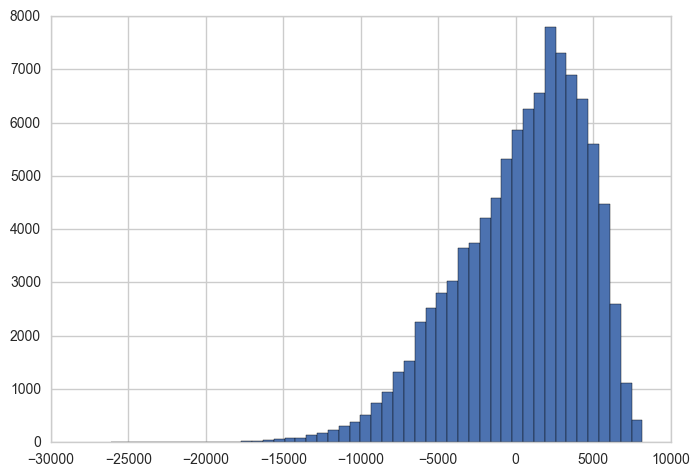

In [27]:
plt.hist(full['field3'], 50)

{'boxes': [<matplotlib.lines.Line2D at 0x119c7f160>],
 'caps': [<matplotlib.lines.Line2D at 0x11a8e1c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a8e5eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a8e5668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119c7fb38>,
  <matplotlib.lines.Line2D at 0x119c7fcf8>]}

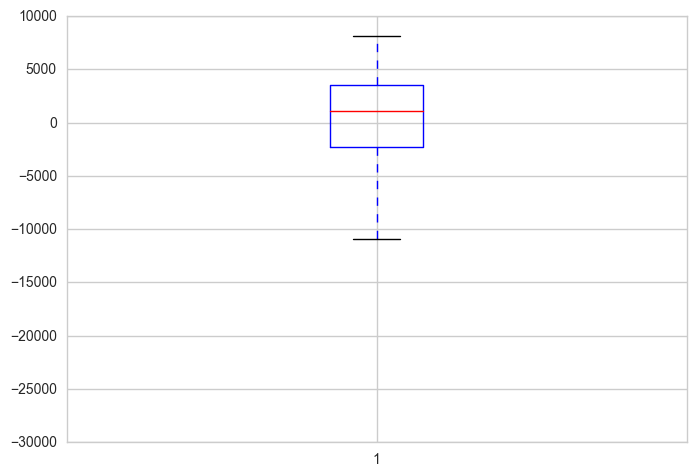

In [28]:
plt.boxplot(full['field3'])

(array([  1.00000000e+00,   6.00000000e+00,   3.00000000e+00,
          2.20000000e+01,   1.10000000e+01,   2.40000000e+01,
          4.00000000e+01,   4.10000000e+01,   5.20000000e+01,
          7.40000000e+01,   6.60000000e+01,   1.04000000e+02,
          1.27000000e+02,   1.52000000e+02,   1.91000000e+02,
          2.63000000e+02,   2.92000000e+02,   3.39000000e+02,
          5.02000000e+02,   5.74000000e+02,   7.56000000e+02,
          1.00200000e+03,   1.16500000e+03,   1.48500000e+03,
          1.79500000e+03,   2.00500000e+03,   2.20700000e+03,
          2.35600000e+03,   2.62400000e+03,   2.84000000e+03,
          3.01200000e+03,   3.31200000e+03,   3.33300000e+03,
          3.88600000e+03,   4.38000000e+03,   4.61600000e+03,
          4.92300000e+03,   5.02000000e+03,   5.50500000e+03,
          6.35100000e+03,   5.97100000e+03,   5.54800000e+03,
          5.19900000e+03,   4.96000000e+03,   4.33600000e+03,
          3.71200000e+03,   2.47400000e+03,   1.40000000e+03,
        

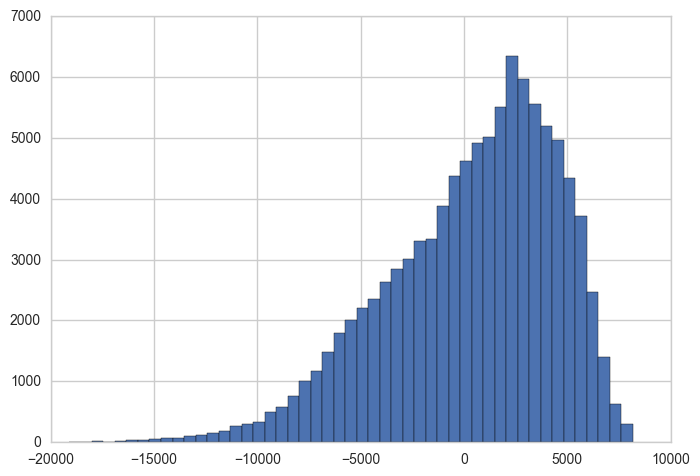

In [29]:
#train['field3'] = train[:,'field3'].apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
full=full[full.field3>=-20000]
#plt.boxplot(train2['field3'])
plt.hist(full['field3'], 50)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['field3'] = pd.Series(scaler.fit_transform(full.field3.values.reshape(-1,1)).reshape(-1), index=full.index)
#from scipy.stats import skew
#skewed_feats=skew(train.field3)
#skewed_feats
#train['field31']=np.log1p(train['field3']-min(train['field3']))

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
np.corrcoef(full['amount'], full['total'])

array([[ 1.,  1.],
       [ 1.,  1.]])

In [32]:
pd.options.display.max_columns =99
full.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud,zip2,domain,domain2
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-0.263576,19,0,0,0,0,0,1,0,z5,comcast.net,d5
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,1.236154,14,1,0,0,1,0,1,0,z5,zjyxs.net,d0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-1.154975,23,0,0,1,1,0,1,0,z10,aol.com,d5
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,1.118732,31,0,0,1,0,0,1,0,z5,sbcglobal.net,d5
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-1.071550,21,0,0,1,0,0,1,0,z5,bellsouth.net,d5


In [33]:
full1=full.copy()
full1.drop(labels=['zip1','custAttr1', 'custAttr2', 'domain','hour2','total'], axis=1, inplace=True)

In [34]:
full1.head()

,amount,hour1,state1,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud,zip2,domain2
0,12.95,0,WA,0,0,0,-0.263576,19,0,0,0,0,0,1,0,z5,d5
1,38.85,0,WA,3,1,0,1.236154,14,1,0,0,1,0,1,0,z5,d0
2,38.85,0,KY,2,1,0,-1.154975,23,0,0,1,1,0,1,0,z10,d5
3,12.95,0,CA,3,0,0,1.118732,31,0,0,1,0,0,1,0,z5,d5
4,38.85,0,GA,3,1,0,-1.071550,21,0,0,1,0,0,1,0,z5,d5


In [35]:
full1.columns.tolist()

['amount',
 'hour1',
 'state1',
 'field1',
 'field2',
 'flag1',
 'field3',
 'field4',
 'indicator1',
 'indicator2',
 'flag2',
 'flag3',
 'flag4',
 'flag5',
 'fraud',
 'zip2',
 'domain2']

In [36]:
full.flag2.value_counts()

1    55634
0    44359
Name: flag2, dtype: int64

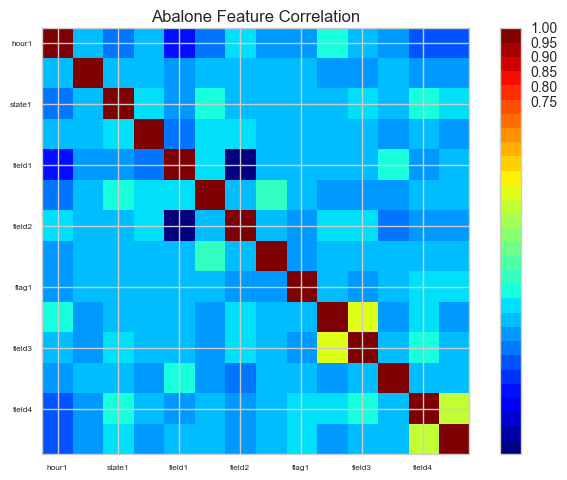

In [37]:
#full.corr(method='pearson', min_periods=1)
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=df.columns.tolist()
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(full1)

In [38]:
#train1 = pd.get_dummies(train1, columns=['hour1', 'hourdiff', 'statecode', 'domaincnt1'])
train = pd.get_dummies(full1, columns=['hour1', 'state1', 'field1','field4','domain2','zip2','flag5'],drop_first=True)

In [39]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X = train.ix[:, train.columns != 'fraud']
y = train.ix[:, train.columns == 'fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [93]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
def printing_Kfold_scores(x_train_data,y_train_data, x_test_data, y_test_data,clf):
    fold = KFold(len(y_train_data),3,shuffle=True) 
    auc_cv_list = []

    for iteration, indices in enumerate(fold,start=1):
#            clf.fit(x_train_data,y_train_data)
#            auc_total = roc_auc_score(y_train_data, clf.predict(x_train_data))
            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            clf.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0]].values.ravel())
            # Predict values using the test indices in the training data
            
            y_pred_cv = clf.predict_proba(x_train_data.iloc[indices[1],:])[:,1]
                        

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            auc_cv = roc_auc_score(y_train_data.iloc[indices[1]],y_pred_cv)
        
            auc_cv_list.append(auc_cv)

#            print('Iteration ', iteration,': auc train score total= ', auc_total)
#            print('Iteration ', iteration,': auc train score = ', auc)
#            print('Iteration ', iteration,': auc score = ', auc)
        # The mean value of those recall scores is the metric we want to save and get hold of.
    y_pred_test=clf.predict_proba(x_test_data)[:,1]
    auc_test = roc_auc_score(y_test_data,y_pred_test)
    print ('Mean auc cv score', np.mean(auc_cv_list), 'auc test score',auc_test)
              
    return np.mean(auc_cv_list),auc_test

In [99]:
from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(random_state=42)
grid = {'n_estimators':[400], 'min_samples_leaf':[5,10,50], 'min_samples_split':[10,100],\
        'max_depth':[50],'oob_score':[True],'n_jobs':[-1], 'random_state':[42]}

from sklearn.grid_search import ParameterGrid

#print(list(ParameterGrid(grid)))
auc_all_param = []
for iteration, param in enumerate(list(ParameterGrid(grid))):
    print(param)
    rfc=RandomForestClassifier(**param)
    auc_cv_mean,auc_test=printing_Kfold_scores(X_train,y_train,X_test,y_test,rfc)
    auc_all_param.append({'iteration':iteration, 'auc_cv_mean':auc_cv_mean,\
                          'auc_test':auc_test,'n_trees':param['n_estimators'],\
                          'min_samples_leaf':param['min_samples_leaf'], \
                          'min_samples_split':param['min_samples_split'], 'max_depth':param['max_depth'] })
auc_score_df = pd.DataFrame(auc_all_param)

{'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 5, 'min_samples_split': 10, 'max_depth': 50, 'n_jobs': -1}
Mean auc cv score 0.892759516826 auc test score 0.903076451834
{'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 5, 'min_samples_split': 100, 'max_depth': 50, 'n_jobs': -1}
Mean auc cv score 0.891984660362 auc test score 0.902442337585
{'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 10, 'min_samples_split': 10, 'max_depth': 50, 'n_jobs': -1}
Mean auc cv score 0.888883456776 auc test score 0.895651792069
{'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 10, 'min_samples_split': 100, 'max_depth': 50, 'n_jobs': -1}
Mean auc cv score 0.888808227572 auc test score 0.895428492656
{'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 50, 'min_samples_split': 10, 'max_depth': 50, 'n_jobs': -1}
Mean auc cv score 0.86942218769 auc test sc

In [100]:
auc_score_df

,auc_cv_mean,auc_test,iteration,max_depth,min_samples_leaf,min_samples_split,n_trees
0,0.892760,0.903076,0,50,5,10,400
1,0.891985,0.902442,1,50,5,100,400
2,0.888883,0.895652,2,50,10,10,400
3,0.888808,0.895428,3,50,10,100,400
4,0.869422,0.881972,4,50,50,10,400
5,0.871668,0.882243,5,50,50,100,400


In [98]:
auc_score_df.to_csv('auc_scores.csv')

In [91]:
param={'oob_score': True, 'n_estimators': 400, 'random_state': 42, 'min_samples_leaf': 5, \
 'min_samples_split': 10, 'max_depth': 30, 'n_jobs': -1, 'class_weight':'balanced'}
rfc=RandomForestClassifier(**param)
rfc.fit(X_train,y_train.values.ravel())

ypred_train=rfc.predict_proba(X_train)[:,1]
ypred_test=rfc.predict_proba(X_test)[:,1]
print ('auc training', roc_auc_score(y_train,ypred_train))
print ('auc test', roc_auc_score(y_test,ypred_test))

auc training 0.991542755997
auc test 0.917595119982


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=42, \
                             min_samples_split=50, min_samples_leaf=12,oob_score=True, class_weight={1:500})
rfc.fit(X_train,y_train.values.ravel())
y_predrfc=rfc.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predrfc))

             precision    recall  f1-score   support

          0       0.99      0.83      0.91     29154
          1       0.13      0.84      0.22       844

avg / total       0.97      0.83      0.89     29998



In [42]:
y_pred_train=rfc.predict(X_train)
print(classification_report(y_train,y_pred_train))

             precision    recall  f1-score   support

          0       1.00      0.84      0.91     68185
          1       0.14      1.00      0.25      1810

avg / total       0.98      0.84      0.89     69995



class_weight={1:1}
        precision    recall  f1-score   support

          0       0.98      1.00      0.99     29154
          1       0.85      0.34      0.48       844

avg / total       0.98      0.98      0.98     29998

class_weight={1:10}

           precision    recall  f1-score   support

          0       0.99      0.99      0.99     29154
          1       0.63      0.53      0.57       844

avg / total       0.98      0.98      0.98     29998

class_weight={1:50}

   precision    recall  f1-score   support

          0       0.99      0.96      0.98     29154
          1       0.35      0.70      0.46       844

avg / total       0.97      0.95      0.96     29998

class_weight={1:250}
         precision    recall  f1-score   support

          0       0.99      0.86      0.92     29154
          1       0.14      0.80      0.24       844

avg / total       0.97      0.86      0.90     29998


class_weight={1:500}
             precision    recall  f1-score   support

          0       0.99      0.83      0.91     29154
          1       0.13      0.84      0.22       844

avg / total       0.97      0.83      0.89     29998

In [ ]:
y_test[y_test.fraud==1]

In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C =10, penalty = 'l1',class_weight='balanced')
#lr = LogisticRegression(C = best_c, penalty = 'l1',class_weight=None)
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
print(classification_report(y_test,y_pred))

ypred_train=lr.predict_proba(X_train)[:,1]
ypred_test=lr.predict_proba(X_test)[:,1]
print ('auc training', roc_auc_score(y_train,ypred_train))
print ('auc test', roc_auc_score(y_test,ypred_test))

             precision    recall  f1-score   support

          0       0.99      0.85      0.92     29154
          1       0.13      0.80      0.23       844

avg / total       0.97      0.85      0.90     29998

auc training 0.916645918218
auc test 0.915290151466


In [ ]:
y_pred_train = lr.predict(X_train.values)
print(classification_report(y_train,y_pred_train))

In [ ]:
y_fraud=pd.Series(y_train.fraud).tolist()
s_weight=[60 if fraud==1 else 1 for fraud in y_fraud]
s_weight=np.array(s_weight)
s_weight

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate= 0.1, subsample= 0.5)
gbc.fit(X_train,y_train.values.ravel(),sample_weight=s_weight)
y_predgbc=gbc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predgbc))

In [ ]:
from sklearn.ensemble import VotingClassifier
#clf_vc = VotingClassifier(estimators=[('lg', lr), ('rfc', rfc),('gbc', gbc)], 
#                          voting='hard', weights=[1,2,2])
clf_vc = VotingClassifier(estimators=[('lg', lr), ('rfc', rfc)], 
                          voting='hard', weights=[1,2])
clf_vc = clf_vc.fit(X_train, y_train.values.ravel())

In [ ]:
y_predvc=clf_vc.predict(X_test)
print(classification_report(y_test,y_predvc))

In [ ]:
# Number of data points in the minority class
number_records_fraud = len(train1[train1.fraud == 1])
fraud_indices = np.array(train1[train1.fraud == 1].index)

# Picking the indices of the normal classes
normal_indices = train1[train1.fraud == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = train1.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'fraud']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'fraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.fraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.fraud == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

In [ ]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [ ]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),10,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,0.5,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1', class_weight='balanced')
#            lr = LogisticRegression(C = c_param, penalty = 'l1', class_weight=None)
            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
#            precision_acc = precision_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            precision, recall, fscore, support=precision_recall_fscore_support(y_train_data.iloc[indices[1],:].values, y_pred_undersample,average='binary')
            print('Iteration ', iteration,': recall score = ', recall_acc)
#            print('Iteration ', iteration,': precision score = ', precision)
            print "Iteraction %d, recall score= %f, precision = %f fscore=%f" % (iteration, recall, precision,fscore)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [ ]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
lr = LogisticRegression(C = best_c, penalty = 'l1',class_weight='balanced')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)
precision_recall_fscore_support(y_test_undersample, y_pred_undersample,average='binary')

C=10:
precision_recall_fscore_support(y_test_undersample, y_pred_undersample,average='binary') output:
precision_recall_fscore:
0.72677595628415304, 0.60823170731707321, 0.66224066390041492 for class_weight=None
0.63860667634252544, 0.67073170731707321, 0.65427509293680308 for class_weight='balanced'